# Tugas besar Machine Learning 1A (IF 3270)

## Anggota Kelompok:
Lukas Kurnia Jonathan / 13517006

Eginata Kasan / 13517030

Vivianni / 13517060

Rika Dewi / 13517147

## Data Iris

In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree

from id3 import Id3Estimator
from id3 import export_text
from sklearn import preprocessing

/home/vivianni/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
X,Y = load_iris(return_X_y=True) #load Iris File dari skcit
iris = load_iris()

In [53]:
dltIris = tree.DecisionTreeClassifier()
dltIrisFitted = dltIris.fit(X,Y)
r1 = tree.export_text(dltIrisFitted, feature_names=iris['feature_names'])

In [54]:
print(r1)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

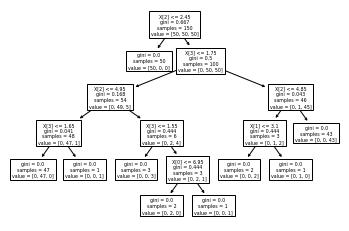

In [56]:
tree.plot_tree(dltIris.fit(iris.data,iris.target))

In [57]:
id3Iris = Id3Estimator(prune = True)
id3IrisFitted = id3Iris.fit(X, Y)
r2 = export_text(id3IrisFitted.tree_, feature_names=iris['feature_names'])

In [58]:
print(r2)


petal length (cm) <=2.60: 0 (36) 
petal length (cm) >2.60
|   petal width (cm) <=1.75: 1 (35/3) 
|   petal width (cm) >1.75
|   |   sepal length (cm) <=6.00
|   |   |   sepal width (cm) <=3.10: 2 (4) 
|   |   |   sepal width (cm) >3.10: 1 (1) 
|   |   sepal length (cm) >6.00: 2 (26) 



## Data Tennis

In [20]:
dataTennis = pd.read_csv('tennis.csv')

In [21]:
dataTennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [22]:
features = ['outlook', 'temp', 'humidity', 'windy', 'play']

le = preprocessing.LabelEncoder()

for f in features:
    dataTennis[f] = le.fit_transform(dataTennis[f])

In [23]:
data = dataTennis.drop(columns=['play'])

In [24]:
target = dataTennis['play']

In [25]:
dltTennis = tree.DecisionTreeClassifier()
dltTennisFitted = dltTennis.fit(data, target)
r3 = tree.export_text(dltTennisFitted, feature_names=features[0:4])

In [26]:
print(r3)

|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- outlook >  1.50
|   |   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: 1



In [27]:
id3Tennis = Id3Estimator()
id3TennisFitted = id3Tennis.fit(data, target)
r4 = export_text(id3Tennis.tree_, feature_names=features[0:4])

In [28]:
print(r4)


outlook <=0.50: 1 (4) 
outlook >0.50
|   humidity <=0.50
|   |   temp <=1.50: 0 (2) 
|   |   temp >1.50
|   |   |   windy <=0.50: 0 (1/1) 
|   |   |   windy >0.50: 0 (1) 
|   humidity >0.50
|   |   windy <=0.50: 1 (3) 
|   |   windy >0.50
|   |   |   temp <=1.00: 0 (1) 
|   |   |   temp >1.00: 1 (1) 



# Perbandingan algoritma DecisionTreeClassifier, Id3Estimator dan hal 56 buku Tom Mitchell

## Penentuan atribut terbaik

Pada buku Tom Mitchell, penentuan atribut dilakukan secara greedy yaitu mencari nilai information gain terbesar untuk setiap atribut yang ada. Information gain sendiri adalah angka yang menghitung seberapa baik sebuah atribut memisahkan training data ke dalam kelas yang menjadi target. Information gain ini didapat dari mengurangi nilai entropi dari training data sekarang terhadap entropi masing-masing value dari atribut yang sedang dihitung.
Library Id3estimator menggunakan pembangunan Decision Tree Learning dengan pendekatan ID3, sedangkan library DecisionTreeClassifier menggunakan pendekatan CART (Classification and Regression Tree). Kedua library ini sama-sama melakukan splitting trees ketika membangun decision tree dengan memilih feature yang menghasilkan information gain terbesar secara greedy. 

Perbedaannya, algoritma pada Id3estimator menghitung information gain dengan melihat perbedaan entropi seperti pada buku Tom Mitchell, sementara algoritma CART pada DecisionTreeClassifier menghitung information gain dengan menggunakan Gini Index. Entropi dan Gini Index sama-sama menghitung impurity dari data, bedanya Gini Index melakukan perhitungan secara kuadratik, sedangkan Entropi melakukan perhitungan secara logaritmik.

## Penanganan label dari cabang setiap nilai atribut

Untuk atribut yang bersifat kategorikal, maka label dari cabang tersebut berupa nilai yang ada pada kategori tersebut. Sedangkan untuk atribut yang bersifat angka atau continuous, maka algoritma tersebut akan mencari terlebih dahulu pivot dari atribut tersebut dan membagi data menjadi dua berdasarkan pivot tersebut, yaitu ke kategori data yang memiliki nilai pivot lebih kecil atau ke data yang memiliki nilai pivot yang lebih besar. Konsep ini berlaku untuk algoritma pada buku Tom Mitchell, library ID3 dan juga library Decision Tree Learning.

## Penentuan label jika examples kosong di cabang tersebut

Pada buku Tom Mitchell terdapat kesamaan dengan library DecisionTreeClassifier dan juga ID3Estimator dalam penentuan label dengan examples kosong pada cabang tertentu. Jika terdapat examples yang kosong di suatu cabang maka akan dibentuk sebuah leaf node pada decision tree yang berisi most common value atau value yang paling sering muncul pada target atribut dari examples yang ada.

## Penanganan atribut kontinu

Algoritma ID3 pada buku Tom Mitchell, library ID3Estimator, dan library Sci-kit learn sama-sama membagi atribut kontinu menjadi bagian-bagian sehingga membentuk atribut yang diskrit. Ketiganya melakukan sorting terhadap atribut kontinu terlebih dahulu, lalu mencari titik pivot dari hasil sorting. Titik pivot digunakan untuk memisahkan  tree dengan membuat dua cabang, yaitu cabang lebih besar sama dengan titik pivot dan cabang kurang dari titik pivot. Jika terdapat lebih dari satu titik pivot, maka akan dihitung information gain dari masing-masing pivot kemudian diambil titik pivot dengan information gain terbesar.

## Penanganan atribut dengan missing values

Pada buku Tom Mitchell, atribut yang memiliki missing values akan diberikan sebuah value yang merupakan modus (most common value) dari kolom feature yang sama untuk menggantikannya atau juga modus dari kolom feature yang memiliki nilai target yang sama atau dengan mengisikan nilai probabilitas kemunculan setiap kemungkinan nilai ke node yang dibawahnya yang kemudian akan berguna untuk perhitungan gain, sedangkan pada library ID3Estimator dan DecisionTreeClassifier, apabila terdapat atribut dengan missing value maka akan dikembalikan pesan error dengan kata lain kedua library ini tidak menghandle adanya missing value.

## Pruning dan parameter confidence

Pada buku Tom Mitchell, terdapat dua cara pruning yaitu dengan menggunakan pendekatan ID3 dan C4.5. Pada pendekatan ID3, setiap node pada tree akan menjadi kandidat untuk dipruning. Pruning dilakukan dengan mengubah subtree yang berakar pada node tersebut menjadi sebuah leaf node yang memberikan most common classification (nilai modus kelas) dari data training yang bersesuaian dengan node tersebut. Pada pendekatan ID3 ini dataset akan dibagi menjadi 3 yaitu data training, data validasi untuk pruning, dan data tes. Jika proses pruning ini meningkatkan akurasi pada data validasi, maka akan dilakukan pruning. Namun jika akurasi menurun, maka pruning pada node tersebut tidak akan dilakukan. 

Pada buku Tom Mitchell untuk pendekatan C4.5 dilakukan dengan pertama-tama membuat terlebih dahulu decision tree yang utuh dari training set. Kemudian tree ini akan dibuat menjadi himpunan rule yang bersesuaian dengan setiap path dari root node hingga leaf node. Prune dilakukan pada setiap rule dengan menghilangkan prekondisi (syarat) yang meningkatkan akurasi pohon secara keseluruhan.

Pada library ID3Estimator, secara default pruning tidak dilakukan. Namun jika dipilih, maka pertama-tama library ID3Estimator akan membagi dataset menjadi training data dan data test. Kemudian akan dibangun decision tree yang utuh berdasarkan training data. Kemudian untuk setiap node pada tree yang sudah terbentuk, akan dilakukan pruning dengan menghilangkan subtree yang berakar pada node tersebut. Hal ini serupa seperti pendekatan ID3 pada buku Tom Mitchell. Bedanya, penentuan pruning atau tidaknya suatu node ditentukan dari tingkat error rate dari tree sebelum dan sesudah pruning. Jika pruning mengakibatkan error rate menurun, maka pruning pada node tersebut akan dilakukan. 

Pada library DecisionTreeClassifier, digunakan algoritma minimal CCP (Cost Complexity Pruning). Pada algoritma ini terdapat parameter alpha yang disebut sebagai complexity parameter. Algoritma CCP mencari sub-pohon dari pohon T yang meminimalkan cost-complexity measure. Pada node tersebut akan dicari link terlemah untuk dipruning. Link terlemah ini didapat dari nilai non-leaf node dengan nilai alpha efektif paling kecil.

Confidence level pada algoritma digunakan untuk mengkalkulasi pessimistic error pada pruning yang dilakukan. Confidence level pada algoritma juga digunakan sebagai pengukuran performansi model yang dihasilkan atau akurasi dari rule yang dibentuk. Pada buku Tom Mitchell, akurasi rule digunakan untuk pengukuran akurasi pada training set dan kemudian dikurangi dengan 1.96 kali standar deviasi.